In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

# Dmension plot library
from mpl_toolkits.mplot3d import Axes3D

from keras import backend as K

#Clear TF memory
cfg = K.tf.ConfigProto()
cfg.gpu_options.allow_growth = True
K.set_session(K.tf.Session(config=cfg))

C:\Users\StrikeWade\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
dataset = make_blobs(n_samples=200, n_features=3, centers=2, random_state=101)
type(dataset)

tuple

In [3]:
dataset

(array([[ 6.49632139e-01,  2.42067587e+00, -9.10073182e+00],
        [ 2.35751674e+00,  3.66993351e-01, -1.07369978e+01],
        [ 2.41199108e+00,  1.03683306e+00, -9.20017913e+00],
        [-4.54894721e+00,  3.73920798e+00,  6.55311625e+00],
        [ 8.56786048e-01,  8.24351204e-01, -9.24182016e+00],
        [-7.97378661e+00,  3.17573928e+00,  5.65319064e+00],
        [-6.26090836e+00,  2.76986893e+00,  7.61918204e+00],
        [-5.64904170e+00,  5.05467716e+00,  6.30007576e+00],
        [-4.97814253e+00,  2.06756166e+00,  8.43165881e+00],
        [-6.65641296e+00,  3.35487547e+00,  8.22567942e+00],
        [-1.30495144e+00,  2.21548111e+00, -1.10980523e+01],
        [ 1.73531080e+00,  2.05515725e+00, -1.03356154e+01],
        [ 6.57618853e-01,  9.16247714e-01, -1.01845852e+01],
        [-6.48403807e+00,  1.82173091e+00,  5.36379508e+00],
        [-5.43739721e+00,  2.78731803e+00,  5.38694536e+00],
        [-6.53809263e+00,  6.59378737e+00,  6.98289463e+00],
        [-5.47779112e+00

In [4]:
#Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset[0])

In [5]:
scaled_data.shape

(200, 3)

In [6]:
data_x = scaled_data[:, 0]
data_y = scaled_data[:, 1]
data_z = scaled_data[:, 2]

# Plot on 3D dimension

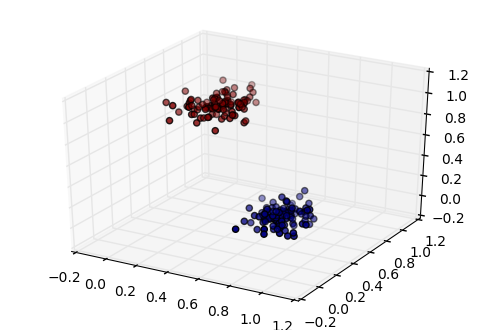

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_x, data_y, data_z, c=dataset[1])

In [8]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

In [9]:
num_inputs = 3 #3 features input
num_hiddens = 2
num_outputs = num_inputs

learning_rate = 0.01
epochs = 1000

#Placeholder
x = tf.placeholder(dtype=tf.float32, shape=[None, num_inputs])

In [10]:
#Hidden layer reduce the 3 dimension to 2 dimension 
hidden_layer = fully_connected(x, num_hiddens, activation_fn=None)
output_layer = fully_connected(hidden_layer, num_outputs, activation_fn=None)

In [11]:
#Loss function
loss = tf.reduce_mean(tf.square(output_layer - x))

#Optimizer function
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

#Init
init = tf.global_variables_initializer()

In [12]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(epochs):
        sess.run(optimizer, feed_dict={x: scaled_data})
        
    output_2d = hidden_layer.eval(feed_dict={x: scaled_data})

In [14]:
output_2d.shape

(200, 2)

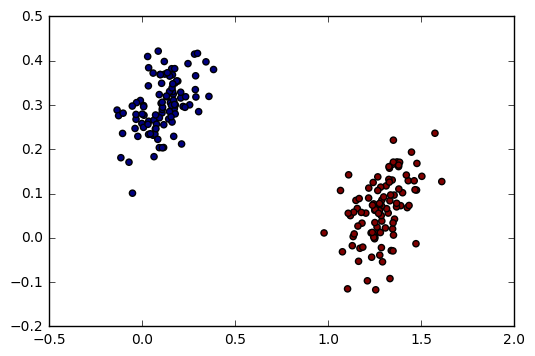

In [16]:
#Plot the reduced data from 3d -> 2d
plt.scatter(output_2d[:,0], output_2d[:,1], c=dataset[1])